In [1]:
# Import pandas datareader and show the version of it
import pandas_datareader
pandas_datareader.__version__

'0.9.0'

In [2]:
# Yahoo recently has become an unstable data source.
# If it gives an error, you may run the cell again, or try yfinance
import pandas as pd
from pandas_datareader import data
# Set the start and end date
start_date = '1990-01-01'
end_date = '2019-02-01'
# Set the ticker
ticker = 'AMZN'
# Get the data
data = data.get_data_yahoo(ticker, start_date, end_date)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-05-15,2.500000,1.927083,2.437500,1.958333,72156000.0,1.958333
1997-05-16,1.979167,1.708333,1.968750,1.729167,14700000.0,1.729167
1997-05-19,1.770833,1.625000,1.760417,1.708333,6106800.0,1.708333
1997-05-20,1.750000,1.635417,1.729167,1.635417,5467200.0,1.635417
1997-05-21,1.645833,1.375000,1.635417,1.427083,18853200.0,1.427083


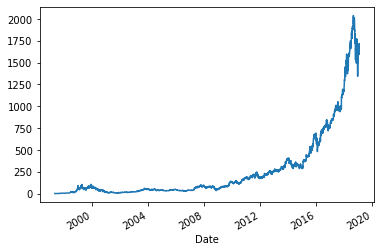

In [3]:
# Visualizing the adjusted close price data
import matplotlib.pyplot as plt
%matplotlib inline
data['Adj Close'].plot()
plt.show()

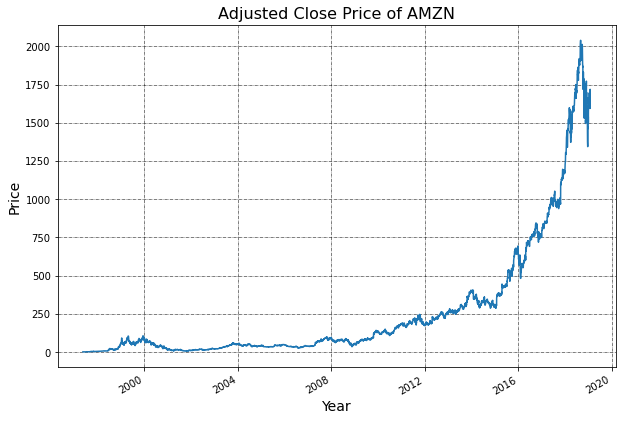

In [4]:
# Plot the adjusted close price
data['Adj Close'].plot(figsize=(10, 7))
# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
plt.show()

In [5]:
# yfinance module can be used to fetch the minute level stock market data. 
# It returns the stock market data for the last 7 days.
"""
The yfinance module has the download method which can be used to download the stock market data. 
It takes the following parameters:

ticker: The name of the tickers you want the data for. 
If you want data for multiple tickers then separate them by space
period: The number of days/month of data required. 
The valid frequencies are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
interval: The frequency of data. 
The valid intervals are 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

The below code fetches the stock market data for MSFT for the past 5 days of 1-minute frequency.
"""
import yfinance as yf
intraday_data = yf.download(tickers="MSFT",
 period="5d",
 interval="1m",auto_adjust=True)
intraday_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2021-06-21 09:30:00-04:00,259.929993,259.980011,259.929993,259.980011,618341
2021-06-21 09:31:00-04:00,259.951202,259.970001,258.980011,258.980011,136647
2021-06-21 09:32:00-04:00,259.000000,259.000000,258.390015,258.600006,125457
2021-06-21 09:33:00-04:00,258.579987,258.871002,258.369995,258.670013,98634
2021-06-21 09:34:00-04:00,258.684998,258.785004,258.415009,258.554993,80219


In [6]:
# A 1-minute frequency data is converted to 10-minute frequency data

# Defining the dictionary with the conversion logic
ohlcv_dict = {
 'Open': 'first',
 'High': 'max',
 'Low': 'min',
 'Close': 'last',
 'Volume': 'sum'
}
# Convert the index to datetime timestamp as by default string is returned. 
# Then call the resample method
intraday_data.index = pd.to_datetime(intraday_data.index)
intraday_data_10 = intraday_data.resample('10T').agg(ohlcv_dict)
intraday_data_10.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2021-06-21 09:30:00-04:00,259.929993,259.980011,257.920013,258.299988,1547824
2021-06-21 09:40:00-04:00,258.350006,259.529999,258.239990,259.149994,1015958
2021-06-21 09:50:00-04:00,259.149994,260.450012,258.940002,260.290009,910925
2021-06-21 10:00:00-04:00,260.299988,261.339996,260.179993,261.059998,867449
2021-06-21 10:10:00-04:00,261.059998,261.229889,260.394012,260.410004,707323


# Start from here first

In [7]:
# Fundamental data
# Import yfinance
import yfinance as yf
# Set the ticker 
ticker = "MSFT"
stock = yf.Ticker(ticker)

In [8]:
# Displaying info on selected stock
stock.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, organizations, and enterprise divisions. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solu

In [20]:
# Downloading the stock data
old = stock.history(start="2020-01-01", end="2021-06-30")
old.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-31,154.413622,155.398591,154.098424,155.329636,18369400,0.0,0
2020-01-02,156.393425,158.314112,155.950192,158.205765,22622100,0.0,0
2020-01-03,155.940346,157.545836,155.684244,156.235825,21116200,0.0,0
2020-01-06,154.719007,156.708649,154.157567,156.639694,20813700,0.0,0
2020-01-07,156.925308,157.270038,154.955370,155.211456,21634100,0.0,0


In [21]:
# Displaying relevant information
stock.actions

,Dividends,Stock Splits
Date,,
2020-02-19,0.51,0.0
2020-05-20,0.51,0.0
2020-08-19,0.51,0.0
2020-11-18,0.56,0.0
2021-02-17,0.56,0.0
2021-05-19,0.56,0.0


In [22]:
stock.dividends

Date
2020-02-19    0.51
2020-05-20    0.51
2020-08-19    0.51
2020-11-18    0.56
2021-02-17    0.56
2021-05-19    0.56
Name: Dividends, dtype: float64

In [23]:
stock.splits

Series([], Name: Stock Splits, dtype: int64)

In [24]:
# Sustainability of the company
stock.sustainability

,Value
2021-5,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.37
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [25]:
stock.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2021-04-28 13:18:05,Morgan Stanley,Overweight,,main
2021-05-13 11:05:37,Rosenblatt,Buy,,init
2021-05-18 13:39:15,Jefferies,Buy,,main


In [26]:
stock.calendar

,0,1
Earnings Date,2021-07-20 00:00:00,2021-07-26 00:00:00
Earnings Average,1.9,1.9
Earnings Low,1.64,1.64
Earnings High,2.03,2.03
Revenue Average,44102900000,44102900000
Revenue Low,40850000000,40850000000
Revenue High,44914700000,44914700000


In [27]:
# For every company listed on the stock market, there is a unique ISIN(International Securities Identification Number) no. 
# we can retrieve this number using YFinance “isin” function
stock.isin

'US5949181045'

In [28]:
# Option expiry date
stock.options

('2021-07-02',
 '2021-07-09',
 '2021-07-16',
 '2021-07-23',
 '2021-07-30',
 '2021-08-20',
 '2021-09-17',
 '2021-10-15',
 '2021-11-19',
 '2022-01-21',
 '2022-03-18',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16')

In [44]:
stock.financials
stock.quarterly_financials

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Research Development,5204000000.0,4899000000.0,4926000000.0,5214000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,17236000000.0,18337000000.0,16124000000.0,13422000000.0
Minority Interest,None,None,None,None
Net Income,15457000000.0,15463000000.0,13893000000.0,11202000000.0
Selling General Administrative,6409000000.0,6086000000.0,5350000000.0,7073000000.0
Gross Profit,28661000000.0,28882000000.0,26152000000.0,25694000000.0
Ebit,17048000000.0,17897000000.0,15876000000.0,13407000000.0
Operating Income,17048000000.0,17897000000.0,15876000000.0,13407000000.0
Other Operating Expenses,None,None,None,None


In [39]:
stock.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,72.17%,% of Shares Held by Institutions
2,72.22%,% of Float Held by Institutions
3,5329,Number of Institutions Holding Shares


In [40]:
stock.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",610849992,2021-03-30,0.0811,144020102613
1,Blackrock Inc.,518649291,2021-03-30,0.0689,122281943339
2,State Street Corporation,292575655,2021-03-30,0.0388,68980562179
3,"FMR, LLC",217585928,2021-03-30,0.0289,51300234244
4,Price (T.Rowe) Associates Inc,178824616,2021-03-30,0.0237,42161479714
5,"Geode Capital Management, LLC",120231394,2021-03-30,0.0160,28346955763
6,Capital World Investors,112150578,2021-03-30,0.0149,26441741775
7,Capital Research Global Investors,99286940,2021-03-30,0.0132,23408881843
8,Capital International Investors,90228967,2021-03-30,0.0120,21273283549
9,Northern Trust Corporation,89762724,2021-03-30,0.0119,21163357437


In [45]:
stock.balance_sheet
stock.quarterly_balance_sheet

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Intangible Assets,8.127000e+09,6.555000e+09,6.923000e+09,7.038000e+09
Total Liab,1.743740e+11,1.739010e+11,1.776090e+11,1.830070e+11
Total Stockholder Equity,1.345050e+11,1.302360e+11,1.233920e+11,1.183040e+11
Other Current Liab,4.006900e+10,3.992600e+10,4.299600e+10,4.600100e+10
Total Assets,3.088790e+11,3.041370e+11,3.010010e+11,3.013110e+11
Common Stock,8.230800e+10,8.189600e+10,8.108900e+10,8.055200e+10
Other Current Assets,1.203400e+10,1.274800e+10,1.357200e+10,1.151700e+10
Retained Earnings,5.073500e+10,4.497300e+10,3.919300e+10,3.456600e+10
Other Liab,3.160100e+10,3.158500e+10,3.317400e+10,3.449200e+10
Good Will,4.969800e+10,4.421900e+10,4.389000e+10,4.335100e+10


In [46]:
stock.cashflow
stock.quarterly_cashflow

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Investments,2.517000e+09,2.593000e+09,2.100000e+09,3.173000e+09
Change To Liabilities,3.600000e+08,-3.194000e+09,-2.749000e+09,1.180200e+10
Total Cashflows From Investing Activities,-9.684000e+09,-1.669000e+09,-5.371000e+09,-4.462000e+09
Net Borrowings,-5.000000e+08,-3.250000e+09,-3.250000e+09,-3.250000e+09
Total Cash From Financing Activities,-1.319200e+10,-1.363400e+10,-1.028900e+10,-1.226200e+10
Change To Operating Activities,1.305000e+09,1.879000e+09,-2.823000e+09,6.430000e+08
Issuance Of Stock,3.960000e+08,3.020000e+08,5.450000e+08,3.400000e+08
Net Income,1.545700e+10,1.546300e+10,1.389300e+10,1.120200e+10
Change In Cash,-7.300000e+08,-2.773000e+09,3.629000e+09,1.866000e+09
Repurchase Of Stock,-6.930000e+09,-6.535000e+09,-6.743000e+09,-5.791000e+09


In [48]:
stock.earnings
stock.quarterly_earnings

,Revenue,Earnings
Quarter,,
2Q2020,38033000000,11202000000
3Q2020,37154000000,13893000000
4Q2020,43076000000,15463000000
1Q2021,41706000000,15457000000


In [50]:
# To initialize multiple Ticker objects
tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects

# access each ticker using (example)
tickers.tickers.MSFT.info
tickers.tickers.AAPL.history(period="1mo")
tickers.tickers.GOOG.actions

AttributeError: 'dict' object has no attribute 'msft'

In [51]:
# Fetch data from multiple tickers
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  3 of 3 completed

3 Failed downloads:
- MSFT: 1m data not available for startTime=1609527840 and endTime=1624734240. Only 7 days worth of 1m granularity data are allowed to be fetched per request.
- AAPL: 1m data not available for startTime=1609527840 and endTime=1624734240. Only 7 days worth of 1m granularity data are allowed to be fetched per request.
- SPY: 1m data not available for startTime=1609527840 and endTime=1624734240. Only 7 days worth of 1m granularity data are allowed to be fetched per request.


# Visualizing the stock data
To be able to use plotly in Jupyter lab, you will need to run the following in e.g. powershell/cmd
jupyter labextension install jupyterlab-plotly
After that, restart jupyterlab

In [29]:
# Reset the index of the data frame and convert the columns to float type
old = old.reset_index()
for i in ['Open', 'High', 'Close', 'Low']: 
      old[i]  =  old[i].astype('float64')

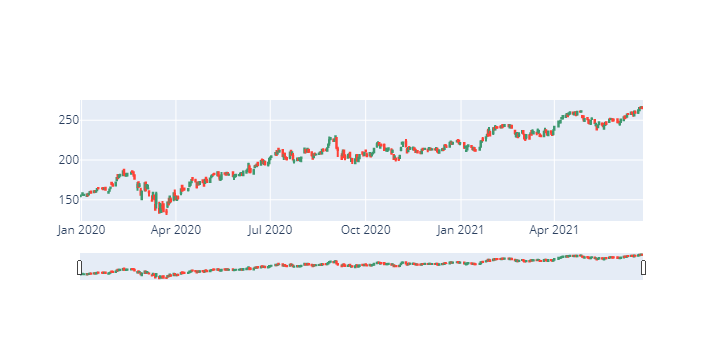

In [30]:
# Candlestick charts
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=old['Date'],
                                     open=old['Open'],
                                     high=old['High'],
                                     low=old['Low'],
                                     close=old['Close'])])
fig.show()

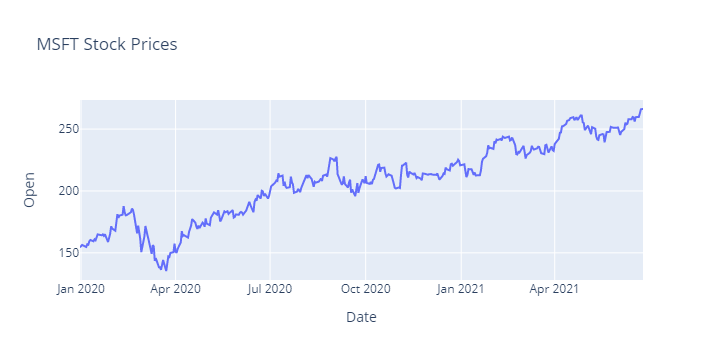

In [34]:
# Line charts
import plotly.express as px
fig = px.line(old, x="Date", y="Open", title= ticker+' Stock Prices')
fig.show()

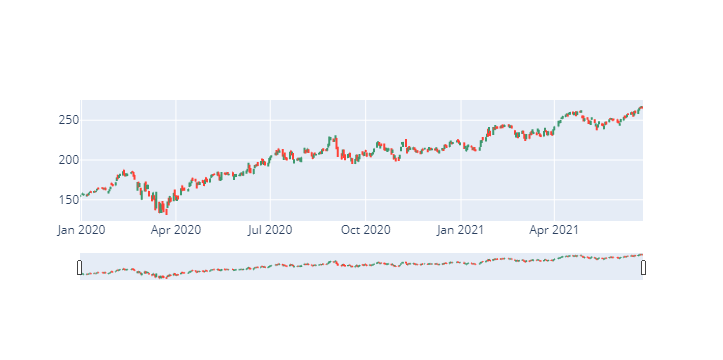

In [36]:
# OHLC charts (Open, High, Low, Close) are similar to candlestick charts
# and are important as they work on the closing price.
fig = go.Figure(data=go.Ohlc(x=old['Date'],
                    open=old['Open'],
                    high=old['High'],
                    low=old['Low'],
                    close=old['Close']))
fig.show()